<a href="https://colab.research.google.com/github/Tan-Yu/GWU_NN/blob/main/GWU_NN_Project_To_Be_Submitted.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cats and Dogs

In [38]:
dataset

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="7qWbVQEyrrOmqn5a34Ik")
project = rf.workspace("roboflow-100").project("soccer-players-5fuqs")
dataset = project.version(1).download("tensorflow")




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.7 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstalled opencv-python-headless-4.8.1.78
  Attempting uninstall: idna
    Found existing 

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to soccer-players-1 in tensorflow:: 100%|██████████| 171/171 [00:00<00:00, 6400.09it/s]


In [33]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

# Set the data path
data_path = "/content/soccer-players-1"

# Function to load and preprocess an image
def load_and_preprocess_image(image_path, bbox):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Normalize pixel values to between 0 and 1

    # Extract bounding box coordinates and normalize them
    xmin, ymin, xmax, ymax = bbox
    # bbox_width = xmax - xmin
    # bbox_height = ymax - ymin

    return img_array, [xmin, ymin, xmax, ymax]

# Load annotations from CSV
def load_annotations(csv_path):
    annotations = pd.read_csv(csv_path)
    return annotations

# Load and preprocess the entire dataset
def load_and_preprocess_dataset(data_path, split='train'):
    images = []
    labels = []

    split_path = os.path.join(data_path, split)
    annotations_path = os.path.join(split_path, '_annotations.csv')

    annotations = load_annotations(annotations_path)

    for index, row in annotations.iterrows():
        image_filename = row['filename']
        image_path = os.path.join(split_path, image_filename)

        img, bbox = load_and_preprocess_image(image_path, [row['xmin'], row['ymin'], row['xmax'], row['ymax']])
        images.append(img)
        labels.append(bbox)

    return np.array(images), np.array(labels)

# Load the train, validation, and test sets
x_train, y_train = load_and_preprocess_dataset(data_path, split='train')
x_valid, y_valid = load_and_preprocess_dataset(data_path, split='valid')
x_test, y_test = load_and_preprocess_dataset(data_path, split='test')

# Build the model
model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='linear')  # Output layer with 4 nodes for bounding box coordinates (x, y, width, height)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_valid, y_valid))

# Evaluate the model on the test set
test_loss = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)

Epoch 1/10
44/44 [==============================] - 4s 67ms/step - loss: 27485.9922 - val_loss: 20118.9746
Epoch 2/10
44/44 [==============================] - 2s 55ms/step - loss: 19089.3828 - val_loss: 19437.9727
Epoch 3/10
44/44 [==============================] - 3s 60ms/step - loss: 18995.2168 - val_loss: 19460.7793
Epoch 4/10
44/44 [==============================] - 2s 56ms/step - loss: 18681.0723 - val_loss: 19403.4180
Epoch 5/10
44/44 [==============================] - 2s 53ms/step - loss: 18444.1543 - val_loss: 19162.3262
Epoch 6/10
44/44 [==============================] - 2s 54ms/step - loss: 18743.0137 - val_loss: 19572.4980
Epoch 7/10
44/44 [==============================] - 2s 54ms/step - loss: 18372.7285 - val_loss: 19307.8789
Epoch 8/10
44/44 [==============================] - 3s 60ms/step - loss: 18030.6328 - val_loss: 19758.5137
Epoch 9/10
44/44 [==============================] - 3s 64ms/step - loss: 18089.7637 - val_loss: 19149.6523
Epoch 10/10
7/7 [====================

FileNotFoundError: ignored

In [34]:
y_test[1]

array([164, 219, 193, 295])

7/7 [==============================] - 0s 20ms/step


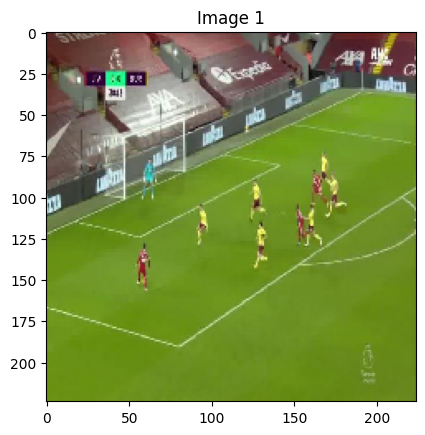

In [36]:
import cv2
import matplotlib.pyplot as plt

# Function to draw bounding boxes on images
def draw_boxes(image, true_box, pred_box, class_label):
    true_box = [int(coord) for coord in true_box]
    pred_box = [int(coord) for coord in pred_box]

    # Draw true box in green
    cv2.rectangle(image, (true_box[0], true_box[1]), (true_box[2], true_box[3]), (0, 255, 0), 2)
    cv2.putText(image, class_label, (true_box[0], true_box[1] - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Draw predicted box in red
    cv2.rectangle(image, (pred_box[0], pred_box[1]), (pred_box[0] + pred_box[2], pred_box[1] + pred_box[3]), (0, 0, 255), 2)
    cv2.putText(image, class_label, (pred_box[0], pred_box[1] - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

# Load and preprocess the test dataset
x_test, y_test = load_and_preprocess_dataset(data_path, split='test')

# Make predictions on the test set
predictions = model.predict(x_test)

# Visualize a few predictions
for i in range(1):  # Adjust the number of images you want to visualize
    img = x_test[i]
    true_bbox = y_test[i]
    pred_bbox = predictions[i]

    # Denormalize bounding box coordinates
    true_bbox_denormalized = [coord * 224 for coord in true_bbox]
    pred_bbox_denormalized = [coord * 224 for coord in pred_bbox]

    # Create a copy of the image for visualization
    vis_img = (img * 255).astype(np.uint8)

    # Draw bounding boxes on the image
    draw_boxes(vis_img, true_bbox, pred_bbox, "Player")

    # Display the image
    plt.imshow(vis_img)
    plt.title(f"Image {i+1}")
    plt.show()


In [37]:
true_bbox

array([152, 359, 182, 453])

In [21]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

# Set the data path
data_path = "/content/soccer-players-1"

# Function to load and preprocess an image
def load_and_preprocess_image(image_path, bbox):
    img = load_img(image_path, target_size=( 720 // 4, 1280 // 4))  # Resize to 1/4 of the original size
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Normalize pixel values to between 0 and 1

    # Extract bounding box coordinates and normalize them
    xmin, ymin, xmax, ymax = bbox

    bbox_scaled = [xmin // 4, ymin // 4, xmax // 4, ymax // 4]  # Scale bounding box coordinates

    return img_array, bbox_scaled

# Load annotations from CSV
def load_annotations(csv_path):
    annotations = pd.read_csv(csv_path)
    return annotations

# Load and preprocess the entire dataset
def load_and_preprocess_dataset(data_path, split='train'):
    images = []
    labels = []

    split_path = os.path.join(data_path, split)
    annotations_path = os.path.join(split_path, '_annotations.csv')

    annotations = load_annotations(annotations_path)

    for index, row in annotations.iterrows():
        image_filename = row['filename']
        image_path = os.path.join(split_path, image_filename)

        img, bbox = load_and_preprocess_image(image_path, [row['xmin'], row['ymin'], row['xmax'], row['ymax']])
        images.append(img)
        labels.append(bbox)

    return np.array(images), np.array(labels)

# Load the train, validation, and test sets
x_train, y_train = load_and_preprocess_dataset(data_path, split='train')
x_valid, y_valid = load_and_preprocess_dataset(data_path, split='valid')
x_test, y_test = load_and_preprocess_dataset(data_path, split='test')

# Build the model
model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180,320, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='linear')  # Output layer with 4 nodes for bounding box coordinates (x, y, width, height)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_valid, y_valid))

# Evaluate the model on the test set
test_loss = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)


Epoch 1/10
44/44 [==============================] - 6s 82ms/step - loss: 1562.8989 - val_loss: 1234.7491
Epoch 2/10
44/44 [==============================] - 3s 57ms/step - loss: 1210.5730 - val_loss: 1209.3650
Epoch 3/10
44/44 [==============================] - 3s 58ms/step - loss: 1197.7800 - val_loss: 1219.2306
Epoch 4/10
44/44 [==============================] - 3s 59ms/step - loss: 1135.9514 - val_loss: 1184.1541
Epoch 5/10
44/44 [==============================] - 3s 60ms/step - loss: 1129.8884 - val_loss: 1197.4301
Epoch 6/10
44/44 [==============================] - 3s 64ms/step - loss: 1136.8545 - val_loss: 1208.1162
Epoch 7/10
44/44 [==============================] - 3s 58ms/step - loss: 1109.9795 - val_loss: 1187.9109
Epoch 8/10
44/44 [==============================] - 3s 60ms/step - loss: 1089.6174 - val_loss: 1180.5975
Epoch 9/10
44/44 [==============================] - 3s 58ms/step - loss: 1107.0941 - val_loss: 1195.0558
Epoch 10/10
7/7 [==============================] - 0s 2

In [31]:

# Function to load and preprocess an image
def load_and_preprocess_image(image_path, bbox):
    img = load_img(image_path, target_size=( 720 // 4, 1280 // 4))  # Resize to 1/4 of the original size
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Normalize pixel values to between 0 and 1

    # Extract bounding box coordinates and normalize them
    # print("before scale", bbox)

    xmin, ymin, xmax, ymax = bbox

    bbox_scaled = [xmin // 4, ymin // 4, xmax // 4, ymax // 4]  # Scale bounding box coordinates
    # print("after scale", bbox_scaled)

    return img_array, bbox_scaled

# Load annotations from CSV
def load_annotations(csv_path):
    annotations = pd.read_csv(csv_path)
    return annotations

# Load and preprocess the entire dataset
def load_and_preprocess_dataset(data_path, split='train'):
    images = []
    labels = []

    split_path = os.path.join(data_path, split)
    annotations_path = os.path.join(split_path, '_annotations.csv')

    annotations = load_annotations(annotations_path)

    for index, row in annotations.iterrows():
        # print("Row is" ,row)
        image_filename = row['filename']
        image_path = os.path.join(split_path, image_filename)
        img, bbox = load_and_preprocess_image(image_path, [row['xmin'], row['ymin'], row['xmax'], row['ymax']])
        images.append(img)
        labels.append(bbox)

    return np.array(images), np.array(labels)

# Load the train, validation, and test sets
# x_train, y_train = load_and_preprocess_dataset(data_path, split='train')
# x_valid, y_valid = load_and_preprocess_dataset(data_path, split='valid')
x_test, y_test = load_and_preprocess_dataset(data_path, split='test')

In [29]:
y_test

array([[ 38,  89,  45, 113],
       [ 41,  54,  48,  73],
       [ 64,  74,  70,  93],
       [ 89,  81,  96, 104],
       [ 87,  63,  96,  81],
       [107,  74, 113,  92],
       [112,  75, 119,  93],
       [120,  60, 130,  82],
       [114,  59, 120,  75],
       [118,  51, 124,  69],
       [ 60,  73,  64,  87],
       [ 63,  63,  67,  76],
       [ 75,  67,  80,  82],
       [ 79,  54,  83,  71],
       [ 81,  84,  86, 103],
       [ 28,  64,  34,  81],
       [101, 121, 109, 142],
       [ 97,  68, 102,  84],
       [ 92,  59,  97,  73],
       [104,  39, 108,  52],
       [114,  37, 118,  50],
       [117,  43, 121,  58],
       [123,  50, 129,  66],
       [112,  67, 116,  85],
       [133,  84, 138, 103],
       [151,  49, 156,  65],
       [111,  82, 117, 100],
       [ 87,  43,  90,  49],
       [  2,  55,   8,  74],
       [ 75,  90,  82, 107],
       [ 84,  77,  89,  95],
       [108,  57, 114,  76],
       [134,  42, 141,  60],
       [ 80, 117,  87, 139],
       [129,  

7/7 [==============================] - 0s 19ms/step
PREDICTION BOX:  [80.20854  67.65974  84.590195 86.57124 ]
TrUE BOUNDING BOX:  [ 38  89  45 113]


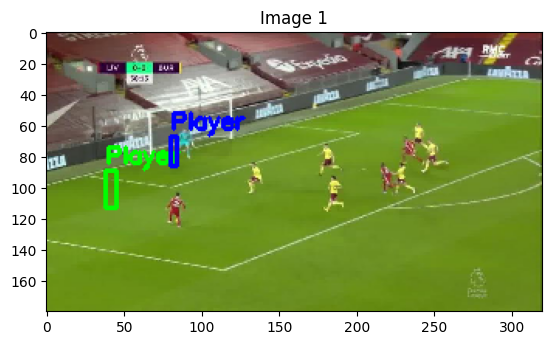

PREDICTION BOX:  [80.20854  67.65974  84.590195 86.57124 ]
TrUE BOUNDING BOX:  [41 54 48 73]


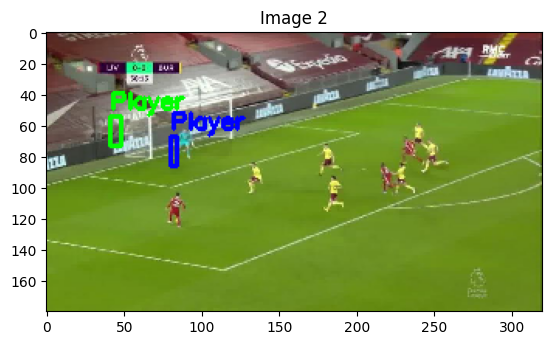

PREDICTION BOX:  [80.20854  67.65974  84.590195 86.57124 ]
TrUE BOUNDING BOX:  [64 74 70 93]


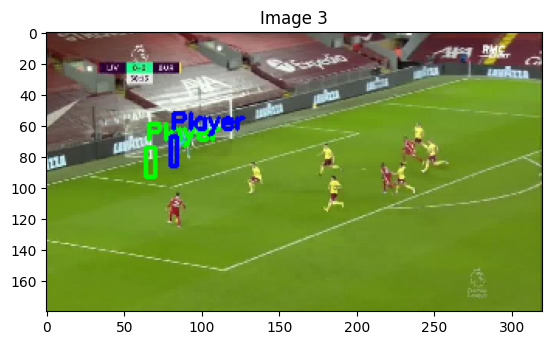

In [32]:

import cv2
import matplotlib.pyplot as plt

# Function to draw bounding boxes on images
def draw_boxes(image, true_box, pred_box, class_label):
    print("TrUE BOUNDING BOX: " ,true_box)
    true_box = [int(coord) for coord in true_box]
    pred_box = [int(coord) for coord in pred_box]

    # Draw true box in green
    cv2.rectangle(image, (true_box[0], true_box[1]), (true_box[2], true_box[3]), (0, 255, 0), 2)
    cv2.putText(image, class_label, (true_box[0], true_box[1] - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Draw predicted box in red
    cv2.rectangle(image, (pred_box[0], pred_box[1]), (pred_box[2], pred_box[3]), (0, 0, 255), 2)
    cv2.putText(image, class_label, (pred_box[0], pred_box[1] - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

# Load and preprocess the test dataset
x_test, y_test = load_and_preprocess_dataset(data_path, split='test')
varible1 = y_test[0]
# Make predictions on the test set
predictions = model.predict(x_test)

# Visualize a few predictions
for i in range(3):  # Adjust the number of images you want to visualize
    img = x_test[i]
    true_bbox = y_test[i]
    pred_bbox = predictions[i]
    print("PREDICTION BOX: ", pred_bbox)

    # Denormalize bounding box coordinates
    # true_bbox_denormalized = [coord * 1280 for coord in true_bbox[:2]] + [coord * 720 for coord in true_bbox[2:]]
    # pred_bbox_denormalized = [coord * 1280 for coord in pred_bbox[:2]] + [coord * 720 for coord in pred_bbox[2:]]

    # Create a copy of the image for visualization
    vis_img = (img * 255).astype(np.uint8)

    # Draw bounding boxes on the image
    draw_boxes(vis_img, true_bbox, pred_bbox, "Player")

    # Display the image
    plt.imshow(vis_img)
    plt.title(f"Image {i+1}")
    plt.show()


In [30]:
varible1

array([ 38,  89,  45, 113])

In [20]:
720 // 4, 1280 // 4

(180, 320)